In [1]:
%matplotlib inline
import pandas as pd

In [2]:
fuf = pd.read_csv('../data/combined_tree_data_with_header.csv').fillna('')
fuf_metrics = pd.read_csv('../data/fuf_with_metrics.csv')

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
from fuzz

In [3]:
#already done
fuf_data_updated['hardscape_metric'] = fuf_data_updated['hardscape_damage'].apply(lambda x: 0 if x in ['None',
                                                                                    'No', 'NA'] else 1)
fuf_data_updated['vacant_lot_metric'] = fuf_data_updated['condition'].apply(lambda x: 0 if x != 'Vacancy' else 1)
fuf_data_updated['condition_metric'] = fuf_data_updated['condition'].apply(lambda x: 0 if x in ['Poor','Dead',
                                                                               'Critical'] else 1)
fuf_data_updated['stump_metric'] = fuf_data_updated['condition'].apply(lambda x: 1 if x in ['Stump', 
                                                                                            'Stump Removal'] else 0)
grouped = fuf_data_updated[['hardscape_metric','diameter_at_breast_height','neighborhood',
          'vacant_lot_metric', 'condition_metric', 'stump_metric']].groupby('neighborhood').mean().reset_index()
joined = pd.merge(fuf_data_updated, grouped, on='neighborhood', how = 'left', suffixes=('_binary','_perc'))

grouped_with_count = fuf[['hardscape_metric','diameter_at_breast_height','neighborhood',
          'vacant_lot_metric', 'condition_metric', 'stump_metric']].groupby('neighborhood').agg(['mean',
                                                                                                'count']).reset_index()

NameError: name 'fuf_data_updated' is not defined

**hardscape**

In [4]:
hard = fuf[['neighborhood', 'hardscape_damage']].groupby(['neighborhood', 'hardscape_damage']).size().reset_index().pivot('neighborhood', 'hardscape_damage', 0).fillna('').reset_index()

In [5]:
# these neighborhood report hardscape as y/n
binary_hardscape = hard[(hard.No<>'')&(hard.Yes<>'')&(hard.Sidewalk=='')]
len(binary_hardscape)

42

In [6]:
# these include specific types of hardcape (sidewalk/etc, can still be yes/no)
continuous_hardscape = hard[~hard.isin(binary_hardscape)].dropna()
len(continuous_hardscape)

27

**condition**

In [7]:
cond = fuf[['neighborhood', 'condition']].groupby(['neighborhood', 'condition']).size().reset_index().pivot('neighborhood', 'condition', 0).fillna('').reset_index()

In [8]:
fuf.condition.value_counts()
fuf['condition'] = fuf.condition.apply(lambda x: x.lower().strip())
fuf.condition.value_counts()

fair               47743
poor               25219
good               23695
vacancy             8666
                    3395
dead                1110
very good            738
very                 708
stump                313
stump removal        222
critical             205
excellent            175
open                 106
unsuitable site       35
6/15/16                1
Name: condition, dtype: int64

In [12]:
#assuming very = very good
condition_score = {
    'fair':3,
    'poor':2,
    'good':4,
    'dead':0,
    'excellent':6,
    'very':5,
    'very good':5,
    'critical':1
}

In [10]:
fuf[fuf.condition.isin(['open', 'unsuitable site', 'stump', 'stump removal', 'vacancy'])]['maintenance_notes'].value_counts()

Infill Plant            8750
Stump Removal            529
Fill Tree Well            43
Small Routine Prune        8
Training Prune             5
Large Routine Prune        2
Priority 2 Prune           2
Priority 2 Removal         2
Cut New Well & Plant       1
Name: maintenance_notes, dtype: int64

**dbh**

In [81]:
fuf[fuf.neighborhood=='Outer Richmond'].condition.value_counts()

vacancy          2764
good             1799
fair             1649
poor              693
very good         107
dead               65
stump removal      40
excellent          29
critical            8
open                2
Name: condition, dtype: int64

In [12]:
fuf[fuf.diameter_at_breast_height==0].maintenance_notes.value_counts()

Infill Plant                5355
Plant                       2943
Fill Tree Well                33
Small Routine Prune           12
Stump Removal                 10
Training Prune                 7
Priority 2 Prune               7
Large Routine Prune            5
Small Tree Routine Prune       4
Priority 1 Prune               3
Routine Prune                  2
Large Tree Routine Prune       2
Priority 1 Removal             1
Cut New Well & Plant           1
Priority 2 Removal             1
                               1
Name: maintenance_notes, dtype: int64

In [128]:
fuf[fuf.diameter_at_breast_height>100]

,tree_id,neighborhood,on_street_name,side,scientific_species_name,common_species_name,diameter_at_breast_height,condition,parkway_space_type,parkway_largest_dimension,trunks,maintenance_notes,status,hardscape_damage,observation_notes,clearance,longitude,latitude
606,301054,Presidio Heights,CLAY ST,Front,Platanus x acerifolia,London Plane Tree,1920,poor,Well/Pit,3,1,Large Routine Prune,1,None,Pollarded,None,-122.451179,37.788502
43673,717816,Outer Mission,HEARST AVE,Side,Brugmansia versicolor,Angel's Trumpet,105,fair,Behind Parkway,12,9,Priority 2 Prune,1,None,None,Fence,-122.442387,37.730802
50263,415767,Glen Park,SAN JOSE AVE,Front,Cupressus macrocarpa,Monterey Cypress,151,fair,Slope,99,6,Priority 1 Prune,1,,See Note,Light,-122.425540,37.737613


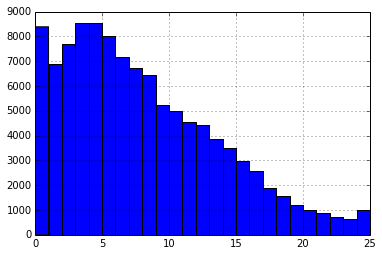

In [137]:
fuf[fuf.diameter_at_breast_height<=25]['diameter_at_breast_height'].hist(bins=25)

In [139]:
fuf.parkway_space_type.value_counts()

Well/Pit                53832
Tree Well               27049
Parkway                  6200
Open/Unrestricted        4473
Behind Parkway           3865
Planter Strip            3661
Median                   3252
Monolithic               2894
Well                     1848
Planter                  1089
Slope                     978
Unimproved                736
Other/Maintained          512
Well w/ Grate             370
Back of Sidewalk          273
Well w/ Cover             271
Raised Planter            205
Curb and Gutter           148
Open area/turf            148
Encroached                144
Well (Back of ROW)        132
Park                      111
                           29
Parking Lot                20
Street Tree                16
Walkway                    15
Well with Cover            12
Tree Well With Grate       11
Walk Way                   10
Well with Grate             8
Island                      7
Behind Parkwy               5
Walkway Unimproved          3
Behind par

In [70]:
from nltk.tokenize import RegexpTokenizer
def preprocess(sentence):
    sentence = sentence.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    return " ".join(tokens)

In [79]:
from fuzzywuzzy import fuzz

In [82]:
species = list(set(fuf.processed_species))

fuzz.

In [89]:
for s in species:
    for z in species:
        if fuzz.ratio(s,z)>90 and s<> z:
            print s, '<=>', z

pyrus calleryana bradford <=> pyrus calleryana new bradford
populus nigra var italica <=> populus nigra italica
malus floribunda <=> malus x floribunda
z add 6 <=> z add 06
acer plantanoides <=> acer platanoides
malus x floribunda <=> malus floribunda
populus nigra italica <=> populus nigra var italica
leptospernum laevigatum <=> leptospermum laevigatum
photinia fraseri <=> photinia x fraseri
metrosideros excelsa <=> metrosideros excelsus
z add 19 <=> z add 9
acer platanoides <=> acer plantanoides
metrosideros excelsus <=> metrosideros excelsa
z add 9 <=> z add 19
aesculus x carnea <=> aesculus carnea
pyrus calleryana new bradford <=> pyrus calleryana bradford
lagunaria patersonii <=> lagunaria patersonia
prunus x yedoensis hakebono <=> prunus x yedoensis fakebono
prunus x yedoensis hakebono <=> prunus x yedoensis eakebono
cotinus coggygria <=> cotinus coggyria
leptospermum laevigatum <=> leptospernum laevigatum
arbutus x marina <=> arbutus marina
prunus yedoensis <=> prunus x yedoensi

In [88]:
fuf[fuf.processed_species=='z add 9']

,tree_id,neighborhood,on_street_name,side,scientific_species_name,common_species_name,diameter_at_breast_height,condition,parkway_space_type,parkway_largest_dimension,trunks,maintenance_notes,status,hardscape_damage,observation_notes,clearance,longitude,latitude,processed_species
67645,EA 20121019153438,Central Sunset,26TH AVE,Front,Z-ADD 9,,2,fair,Tree Well,2,1,Small Tree Routine Prune,,No,None,No,-122.484195,37.756053,z add 9
78866,EA 20121022163339,Parkside,QUINTARA ST,Front,Z-ADD 9,,3,fair,Planter Strip,4,2,Small Tree Routine Prune,,No,None,Yes,-122.481180,37.748342,z add 9
78867,EA 20121022163705,Parkside,QUINTARA ST,Front,Z-ADD 9,,3,good,Planter Strip,4,1,Small Tree Routine Prune,,No,None,Yes,-122.481104,37.748345,z add 9
78868,EA 20121022163812,Parkside,QUINTARA ST,Front,Z-ADD 9,,3,fair,Planter Strip,4,3,Small Tree Routine Prune,,No,Other - see notes,No,-122.481038,37.748344,z add 9
78869,EA 20121022164224,Parkside,QUINTARA ST,Front,Z-ADD 9,,5,fair,Planter Strip,4,1,Small Tree Routine Prune,,No,None,Yes,-122.480976,37.748350,z add 9
78870,EA 20121022164341,Parkside,QUINTARA ST,Front,Z-ADD 9,,3,good,Planter Strip,4,2,Small Tree Routine Prune,,No,None,Yes,-122.480913,37.748357,z add 9
78874,EA 20121023081735,Parkside,QUINTARA ST,Front,Z-ADD 9,,4,fair,Tree Well,3,2,Small Tree Routine Prune,,No,Other - see notes,Yes,-122.480548,37.748369,z add 9
78875,EA 20121023081952,Parkside,QUINTARA ST,Front,Z-ADD 9,,4,fair,Tree Well,3,1,Small Tree Routine Prune,,No,Other - see notes,Yes,-122.480469,37.748372,z add 9
78876,EA 20121023082132,Parkside,QUINTARA ST,Front,Z-ADD 9,,4,fair,Tree Well,3,2,Small Tree Routine Prune,,No,None,Yes,-122.480396,37.748376,z add 9
78877,EA 20121023082346,Parkside,QUINTARA ST,Front,Z-ADD 9,,3,fair,Tree Well,3,3,Small Tree Routine Prune,,No,None,No,-122.480333,37.748381,z add 9


In [93]:
bad_condition = ['dead', 'vacancy', 'stump', 'unsuitable site', 'stump removal', 'open']
import numpy as np

diversity = fuf[~fuf.condition.isin(bad_condition)].groupby('neighborhood').scientific_species_name.agg(['nunique', 
                                                                                'count']).reset_index()
diversity['diversity_score'] = diversity.nunique/diversity['count']

In [100]:
d = [1,2,3,4,5]
d2 = d

In [99]:
def get_idf_dict(corpus):
    tf = TfidfVectorizer()
    idf_dict = defaultdict(float)
    idf_matrix = tf.fit(corpus)
    feature_names = idf_matrix.get_feature_names()
    idf = zip(feature_names, idf_matrix.idf_)
    for i in idf:
        idf_dict[i[0]] = i[1]
    return idf_dict

{'a': 5, 'b': 2}

In [136]:
corpus = fuf.groupby('neighborhood').processed_species.apply(list).reset_index().processed_species.reset_index()
corpus['processed_species'] = corpus.processed_species.apply(lambda x: '\n'.join(x))
corpus = list(corpus.processed_species)

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [138]:
tf = TfidfVectorizer(token_pattern='\\n')
idf_matrix = tf.fit(corpus)
feature_names = idf_matrix.get_feature_names()

In [139]:
feature_names

[u'\n']

In [140]:
feature_names

[u'\n']

In [7]:
sf = pd.read_csv('../data/fuf_salesforce_data.csv').fillna('')

In [12]:
sf.columns

Index([u'Tree Planting: Planting ID', u'Tree Species', u'Tree Bldg Num',
       u'Tree Street', u'Tree Zip Code', u'Neighborhood', u'Cross Street',
       u'Basin Type', u'Permit #', u'Survey2mDoneDate', u'Survey2mStatus',
       u'Care1Done', u'2yrDone', u'Survey2yrStatus', u'3yrDone',
       u'Survey3yrStatus', u'4yrDone', u'Survey4yrStatus', u'5yrDone',
       u'Survey5yrStatus'],
      dtype='object')

In [13]:
sf.describe()

,Tree Planting: Planting ID,Tree Species,Tree Bldg Num,Tree Street,Tree Zip Code,Neighborhood,Cross Street,Basin Type,Permit #,Survey2mDoneDate,Survey2mStatus,Care1Done,2yrDone,Survey2yrStatus,3yrDone,Survey3yrStatus,4yrDone,Survey4yrStatus,5yrDone,Survey5yrStatus
count,61745,61745,61745,61745,61745,61745,61745,61745,61745,61745,61745,61745,61745,61745,61745,61745,61745,61745,61745,61745
unique,61745,395,7154,2435,634,53,6327,142,1098,348,10,1099,263,6,1130,7,31,4,503,6
top,A-32230,,,Folsom St,94110,Mission,,,,,,,,,,,,,,
freq,1,10243,1955,508,8761,6000,20441,35762,59982,57113,47310,34189,60985,60998,40350,43055,61684,61685,58501,58699


In [14]:
sf

,Tree Planting: Planting ID,Tree Species,Tree Bldg Num,Tree Street,Tree Zip Code,Neighborhood,Cross Street,Basin Type,Permit #,Survey2mDoneDate,Survey2mStatus,Care1Done,2yrDone,Survey2yrStatus,3yrDone,Survey3yrStatus,4yrDone,Survey4yrStatus,5yrDone,Survey5yrStatus
0,A-61746,,743,North Point St,94109,Nob Hill/Chinatown,Hyde & Leavenworth,,776830,,,,,,,,,,,
1,A-24604,Prunus serrulata 'Kwanzan',456,Missouri St,94107,Potrero Hill,19th-20th St.,3x3,,,,9/30/1999,,,11/3/2001,,,,,
2,A-7957,Prunus yedoensis 'Akebono',960,Anza St,94118,USF/NoPa,Almaden Court,,,,,,,,,,,,,
3,A-63601,,,,,Crocker Amazon/Cayuga Terrace,,,,,,,,,,,,,,
4,A-24605,Trachycarpus fortunei,1000,Jarboe Ave,94110,Bernal Heights,Bronte And Bradford,,,,,8/31/2000,,,4/13/2002,1 Very healthy,,,,
5,A-7958,Acacia baileyana 'Purpurea',449,Parker Ave,94118,USF/NoPa,Turk,,,,,,,,,,,,,
6,A-61747,Lagunaria patersonii,1750,Silliman St,94134,Excelsior,Madison,3.5x4,776829,,,,,,,,,,,
7,A-24606,Acacia baileyana,335,Paris St,94112,Excelsior,Brasil/Persia,3x3,,,,,,,,,,,,
8,A-7959,Callistemon citrinus,3521,Webster St,94123,Marina/Cow Hollow,Bay,,,,,3/31/1995,,,,,,,,
9,A-61745,,471,Vallejo St,94133,North Beach/Telegraph Hill,Kearny & Montgomery,,,,,,,,,,,,,


In [4]:
fuf_data_updated = pd.read_csv('../data/combined_tree_data_with_header_with_derived_neighborhood.csv').fillna('')

In [6]:
fuf_data_updated.columns

Index([u'tree_id', u'survey_neighborhood', u'on_street_name', u'side',
       u'scientific_species_name', u'common_species_name',
       u'diameter_at_breast_height', u'condition', u'parkway_space_type',
       u'parkway_largest_dimension', u'trunks', u'maintenance_notes',
       u'status', u'hardscape_damage', u'observation_notes', u'clearance',
       u'longitude', u'latitude', u'derived_neighborhood', u'hardscape_metric',
       u'vacant_lot_metric', u'condition_metric', u'stump_metric'],
      dtype='object')

In [9]:
fuf_data_updated['hardscape_metric'] = fuf_data_updated['hardscape_damage'].apply(lambda x: 0 if x in ['None',
                                                                                    'No', 'NA'] else 1)
fuf_data_updated['vacant_lot_metric'] = fuf_data_updated['condition'].apply(lambda x: 0 if x != 'Vacancy' else 1)
fuf_data_updated['condition_metric'] = fuf_data_updated['condition'].apply(lambda x: 0 if x in ['Poor','Dead',
                                                                               'Critical'] else 1)
fuf_data_updated['stump_metric'] = fuf_data_updated['condition'].apply(lambda x: 1 if x in ['Stump', 
                                                                                            'Stump Removal'] else 0)
grouped = fuf_data_updated[['hardscape_metric','diameter_at_breast_height','derived_neighborhood',
          'vacant_lot_metric', 'condition_metric', 'stump_metric']].groupby('derived_neighborhood').mean().reset_index()
joined = pd.merge(fuf_data_updated, grouped, on='derived_neighborhood', how = 'left', suffixes=('_binary','_perc'))

In [11]:
joined.groupby('derived_neighborhood')['hardscape_metric_perc', 'vacant_lot_metric_perc', 'condition_metric_perc', agg(['count', 'mean'])

diameter_at_breast_height_binary             \
                                                    count       mean   
derived_neighborhood                                                   
Alamo Square                                          479  10.246347   
Anza Vista                                            496   8.092742   
Aquatic Park / Ft. Mason                              140   8.714286   
Ashbury Heights                                       836   9.739234   
Balboa Terrace                                        378   7.791005   
Bayview                                              1255   6.845418   
Bernal Heights                                       3251   8.501077   
Bret Harte                                            313   5.763578   
Buena Vista                                          1107   9.118338   
Castro                                                661   8.880484   
Cathedral Hill                                        397   9.841310   
Cayuga                                                803   7.503113   
Central Waterfront                                    603   6.275290   
Chinatown                                              86   7.976744   
Civic Center                                          104   8.730769   
Clarendon Heights                                      30   6.000000   
Cole Valley                                           421  10.814727   
Corona Heights                                        450   9.853333   
Cow Hollow                                             41   8.463415   
Crocker Amazon                                        718   6.133705   
Diamond Heights                                       502   8.537849   
Dogpatch                                              718   7.221448   
Dolores Heights                                      2224   9.642536   
Downtown / Union Square                                13   9.769231   
Duboce Triangle                                      1119  10.440572   
Eureka Valley                                        1756   8.958428   
Excelsior                                            2004   7.453593   
Fairmount                                            1250  10.789600   
Financial District                                     32  11.218750   
Fishermans Wharf                                      121  10.884298   
...                                                   ...        ...   
Parkside                                             5931   6.432811   
Parnassus Heights                                     551   9.718693   
Peralta Heights                                       439   8.113895   
Polk Gulch                                            452   8.623894   
Portola                                              1246   6.793740   
Potrero Hill                                         4336   8.559963   
Presidio Heights                                     1991  10.621296   
Presidio National Park                                 21  11.619048   
Presidio Terrace                                      630  11.317460   
Rincon Hill                                            31   7.709677   
Russian Hill                                          906   9.320088   
Seacliff                                              174   8.873563   
Sherwood Forest                                       209   5.928230   
Showplace Square                                      169   9.763314   
Silver Terrace                                         53   6.962264   
South of Market                                       721   7.158114   
St. Francis Wood                                     1185  12.844726   
St. Marys Park                                        425   8.585882   
Sunnyside                                            2462   8.774980   
Sutro Heights                                         835   6.873054   
Telegraph Hill                                        127  10.622047   
Tenderloin                                            106   6.726

In [38]:
len(df.scientific_species_name.apply(lambda x: x.split()[0]).value_counts())

245

In [43]:
bad_condition = ['dead', 'vacancy', 'stump', 'unsuitable site', 'stump removal', 'open']
import numpy as np
diversity = df[~df.condition.isin(bad_condition)].groupby('derived_neighborhood').genus.agg(['nunique', 
                                                                                'count']).reset_index()
diversity['pct_of_genus'] = diversity.nunique/245

In [62]:
diversity = df[~df.condition.isin(bad_condition)].groupby(['derived_neighborhood', 'genus']).size().reset_index().rename(columns={0:'cnt'})

cnts = df[~df.condition.isin(bad_condition)].groupby(['derived_neighborhood']).size().reset_index().rename(columns={0:'cnt'})

In [63]:
from __future__ import division
diversity = pd.merge(diversity,cnts,on='derived_neighborhood')
#pd.merge(diversity,cnts,on='derived_neighborhood').apply(lambda x: x['cnt_x']/x['cnt_y'], axis=1)

In [69]:
diversity['pct'] = diversity.apply(lambda x: x.cnt_x/x.cnt_y, axis=1)
diversity['not_diverse'] = diversity.pct.apply(lambda x: 1 if x>=.2 else 0)

In [73]:
diversity.groupby('derived_neighborhood').not_diverse.sum().reset_index().to_csv('neighborhood_diversity.csv')

In [75]:
diversity.groupby('derived_neighborhood').not_diverse.sum().reset_index()

,derived_neighborhood,not_diverse
0,Alamo Square,0
1,Anza Vista,1
2,Aquatic Park / Ft. Mason,1
3,Ashbury Heights,0
4,Balboa Terrace,1
5,Bayview,1
6,Bernal Heights,0
7,Bret Harte,1
8,Buena Vista,0
9,Castro,0
